# Part 6 
## Drawing Geometric Shape and Fractals

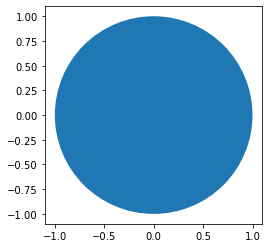

In [3]:
'''
Drawing a Circle
'''

import matplotlib.pyplot as plt

def create_circle():
    circle = plt.Circle((0, 0), radius = 1)
    return circle

def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
    plt.show()
    
if __name__ == '__main__':
    c = create_circle()
    show_shape(c)
    

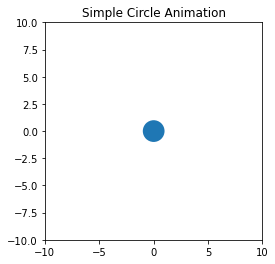

In [6]:
'''
Creating Animated Figures

A Growing circel
'''

import matplotlib.pyplot as plt
from matplotlib import animation

def create_radius():
    circle = plt.Circle((0, 0), 0.5)
    return circle

def update_radius(i, circle):
    circle.radius = i*0.5
    return circle,

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    anim = animation.FuncAnimation(
            fig, update_radius, fargs= (circle,), frames=30, interval=100)
    plt.title('Simple Circle Animation')
    plt.show()

if __name__ == '__main__':
    create_animation()

Enter the initial velocity (m/s) : 4
Enter the angle of projection (degrees): 6


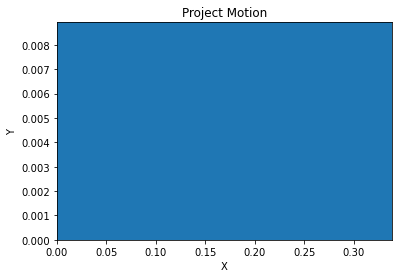

In [14]:
'''
Animate the trajectory of an object in projectile motion
'''
from matplotlib import pyplot as plt
from matplotlib import animation
import math

g = 9.8

def get_intervals(u, theta):
    
    t_filght = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_filght:
        intervals.append(start)
        start = start + interval
    return intervals

def update_position(i, circle, intervals, u, theta):
    
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)* - 0.5*g*t*t
    circle.center = x, y
    return circle,

def create_animation(u, theta):
    intervals = get_intervals(u, theta)
    
    xmin = 0 
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim=(xmin, xmax), ylim=(ymin, ymax))
    
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    
    anim = animation.FuncAnimation(fig, update_position,fargs=(circle, intervals,u, theta),
                                  frames=len(intervals), interval=1, repeat=False)
    plt.title('Project Motion')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
if __name__ == '__main__':
    try:
        u = float(input('Enter the initial velocity (m/s) : '))
        theta = float(input('Enter the angle of projection (degrees): '))
    except ValueError:
        print('You enterd an invalid input')
    else:
        theta = math.radians(theta)
        create_animation(u, theta)

Entter the number of iterations: 100


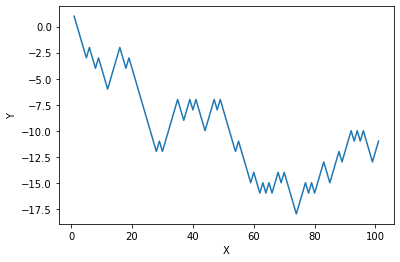

In [19]:
'''
Example of selecting a transformation from two equally probable
transformations
'''
import matplotlib.pyplot as plt
import random

def transformation_1(p):
    x = p[0]
    y = p[1]
    return x + 1, y - 1

def transformation_2(p):
    x = p[0]
    y = p[1]
    return x + 1, y + 1

def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2]
    # Pick a random transformation function and call it
    t = random.choice(transformations)
    x, y = t(p)
    return x, y

def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y

if __name__ == '__main__':
    # Initial point
    p = (1,1)
    n = int(input('Entter the number of iterations: '))
    x, y = build_trajectory(p, n)
    # Plot
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    

Enter the number of points in the Fern: 1000


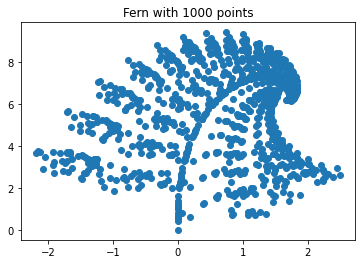

In [25]:
'''
Draw a Barnsley Fern
'''

import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.85*x + 0.04*y
    y1 = -0.4*x + 0.85*y + 1.6
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.2*x - 0.26*y
    y1 = 0.23*x + 0.22*y + 1.6
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = -0.15*x + 0.28*y
    y1 = 0.26*x + 0.24*y + 0.44
    return x1, y1

def transformation_4(p):
    x = p[0]
    y = p[1]
    x1 = 0
    y1 = 0.16*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2, transformation_3, transformation_4]
    probability = [0.85, 0.07, 0.07, 0.01]
    # Pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_fern(n):
    # We start with (0, 0)
    x = [0]
    y = [0]
    
    x1, y1 = 0, 0
    for i in range(n):
        x1, y1 = transform((x1, y1))
        x.append(x1)
        y.append(y1)
    return x, y

if __name__ == '__main__':
    n = int(input('Enter the number of points in the Fern: '))
    x, y = draw_fern(n)
    # Plot the points
    plt.plot(x, y, 'o')
    plt.title(f'Fern with {n} points')
    plt.show()

# Progamming Challenges

## 1: Packing Circles into a Square

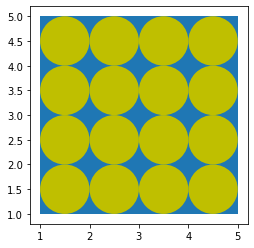

In [9]:
'''
Circles in a square
'''
import matplotlib.pyplot as plt

def draw_square():
    square = plt.Polygon([(1,1), (5, 1), (5, 5), (1, 5)], closed=True)
    return square

def draw_circle(x, y):
    circle = plt.Circle((x, y), radius=0.5, fc='y')
    return circle

if __name__ == '__main__':
    
    ax = plt.gca()
    s = draw_square()
    ax.add_patch(s)
    y = 1.5
    while y < 5:
        x = 1.5
        while x < 5:
            c = draw_circle(x, y)
            ax.add_patch(c)

            x += 1.0
        y += 1.0
    
    plt.axis('scaled')
    plt.show()

## 2: Drawing the Sierpinski Triangle


Enter the deired number of pointsin the Sierpinski Triangle: 1000


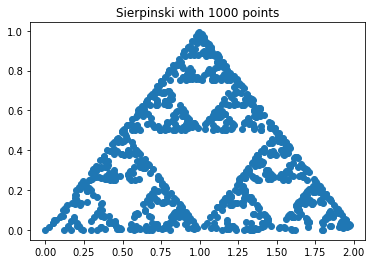

In [10]:
'''
Draw the Sierpinski triangle
'''
import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x
    y1 = 0.5*y
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 0.5
    y1 = 0.5*y + 0.5
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 1
    y1 = 0.5*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    # list of transformation functions
    transformations = [transformation_1, transformation_2, transformation_3]
    probability = [1/3, 1/3, 1/3]
    # pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_sierpinski(n):
    # We start with (0, 0)
    x = [0]
    y = [0]
    
    x1, y1 = 0, 0
    
    for i in range(n):
        x1, y1 = transform((x1, y1))
        x.append(x1)
        y.append(y1)
    return x, y

if __name__ == '__main__':
    n = int(input('Enter the deired number of points'
                     'in the Sierpinski Triangle: '))
    x, y = draw_sierpinski(n)
    # Plot the points
    plt.plot(x, y, 'o')
    plt.title(f'Sierpinski with {n} points')
    plt.show()
    


## 3: Exploring Henon's Function

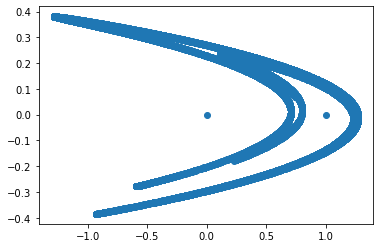

In [12]:
'''
plot 20000 iterations of the Henon function
'''

import matplotlib.pyplot as plt

def transform(p):
    x, y = p
    x1 = y + 1.0 - 1.4*x**2
    y1 = 0.3*x
    
    return x1, y1

if __name__ == '__main__':
    p = (0, 0)
    x = [p[0]]
    y = [p[1]]
    for i in range(20000):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    plt.plot(x, y, 'o')
    plt.show()

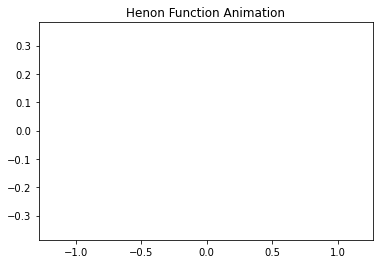

In [13]:
'''
Animating 20000 iteration of the Henon function
'''

import matplotlib.pyplot as plt
from matplotlib import animation

def transform(p):
    x, y = p
    x1 = y + 1.0 - 1.4*x**2
    y1 = 0.3*x
    
    return x1, y1

def update_points(i, x, y, plot):
    plot,set_data(x[:i], y[:i])
    return plot,

if __name__ == '__main__':
    p = (0, 0)
    x = [p[0]]
    y = [p[1]]
    for i in range(10000):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    
    fig = plt.gcf()
    ax = plt.axes(xlim = (min(x), max(x)),
                  ylim = (min(y), max(y)))
plot = plt.plot([], [], 'o')[0]
anim = animation.FuncAnimation(fig, update_points,fargs=(x, y, plot),
                              frames = len(x), interval = 25)
plt.title('Henon Function Animation')
plt.show()

## 4: Drawing the Mandelbrottt Set


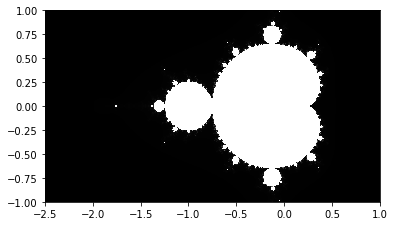

In [38]:
'''
Draw a Mandelbrot set
'''

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Subset of the complex plane we are considiring
x0, x1 = -2.5, 1
y0, y1 = -1, 1

def initilaize_image(x_p, y_p):
    image = []
    for i in range(x_p):
        x_colors = []
        for j in range(x_p):
            x_colors.append(0)
        image.append(x_colors)
    return image

def mandelbrot_set():
    # Number of division along ech axis
    n = 400
    # Maximum iterations
    max_iteration = 1000
    image = initilaize_image(n, n)
    
    # Generate a set of eqully spaced points in the region above
    dx = (x1-x0)/(n-1)
    dy = (y1-y0)/(n-1)
    x_coords = [x0 + i*dx for i in range(n)]
    y_coords = [y0 + i*dy for i in range(n)]

    for i, x in enumerate(x_coords):
        for k, y in enumerate(y_coords):
            z1 = complex(0, 0)
            iteration = 0
            c = complex(x, y)
            while (abs(z1) < 2 and  iteration < max_iteration):
                z1 = z1**2 + c 
                iteration += 1
            image[k][i] = iteration
    return image

if __name__ == '__main__':
    image = mandelbrot_set()
    plt.imshow(image, origin='lower', extent=(x0, x1, y0, y1),
              cmap=cm.Greys_r, interpolation='nearest')
    plt.show()

